In [1]:
import os
import pandas as pd
from tqdm import tqdm

In [2]:
input_directory = "sentiments"

In [3]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

def month(x):
    '''
    Return the month name based on the month number
    Requires list months
    '''
    return months[int(x.split("-")[1])-1]

In [3]:
emotion_by_dates = []

for file in tqdm(os.listdir(input_directory)):
    filename = f"{input_directory}/{file}" # Reading a csv
    df = pd.read_csv(filename)[["parsed_created_at", "Emotion"]] # Taking only the date and emotion columns

    df["parsed_created_at"] = pd.to_datetime(df["parsed_created_at"]) # Converting the datetime string to a datetime object
    df["month"] = df.parsed_created_at.apply(lambda x: f"{x.year}-%02d" % x.month) # Getting months in the format 2020-03

    emotion_by_dates.append(df)

  0%|                                                                                           | 0/90 [00:00<?, ?it/s]c:\users\sharad.duwal\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
 74%|█████████████████████████████████████████████████████████████                     | 67/90 [11:26<03:58, 10.38s/it]c:\users\sharad.duwal\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [15:21<00:00, 10.23s/it]


In [ ]:
full = pd.concat(emotion_by_dates)

# Concatenating data from all 90 files
# (cannot load all 90 files at the same time, so loading piecemeal and concatening at the end)

In [4]:
# Saving the so obtained Python object so that
# we don't have to do this on again on a fresh run

full.to_csv("sentimentsline.csv", index=False)

# Loading the saved file
full = pd.read_csv("sentimentsline.csv")

In [5]:
# Grouping by columns "month" and "Emotion" and getting the counts
new = full.groupby(["month", "Emotion"]).size().reset_index(name="count")
new

,month,Emotion,count
0,2020-03,Anger,112484
1,2020-03,Anticipation,96059
2,2020-03,Disgust,40988
3,2020-03,Fear,2203236
4,2020-03,Joy,1296062
...,...,...,...
75,2020-12,Fear,42357
76,2020-12,Joy,38215
77,2020-12,Sadness,1737
78,2020-12,Surprise,6038


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15.7,12.27)})

In [7]:
# Pivoting the table to obtain the percentage prevalence of each emotion over the current month
new = pd.pivot_table(new, index=['month', 'Emotion'])
new['%'] = (new["count"] / new.groupby(level=0)["count"].transform('sum'))*100
new

count          %
month   Emotion                         
2020-03 Anger          112484   2.037387
        Anticipation    96059   1.739886
        Disgust         40988   0.742403
        Fear          2203236  39.906510
        Joy           1296062  23.475157
...                       ...        ...
2020-12 Fear            42357  35.034739
        Joy             38215  31.608768
        Sadness          1737   1.436725
        Surprise         6038   4.994210
        Trust           26613  22.012407

[80 rows x 2 columns]

In [8]:
# Printing the entire dataframe to test some calculations

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(new)

count          %
month   Emotion                         
2020-03 Anger          112484   2.037387
        Anticipation    96059   1.739886
        Disgust         40988   0.742403
        Fear          2203236  39.906510
        Joy           1296062  23.475157
        Sadness        115611   2.094025
        Surprise       306460   5.550812
        Trust         1350094  24.453821
2020-04 Anger          129412   2.150155
        Anticipation    96269   1.599491
        Disgust         45343   0.753365
        Fear          2171984  36.087087
        Joy           1694421  28.152472
        Sadness        112495   1.869082
        Surprise       314383   5.223412
        Trust         1454422  24.164936
2020-05 Anger           84042   2.296690
        Anticipation    62637   1.711737
        Disgust         26649   0.728261
        Fear          1270302  34.714667
        Joy           1067674  29.177272
        Sadness         58641   1.602534
        Surprise       198842   5.433931
        Trust          890479  24.334908
2020-06 Anger           54493   2.477921
        Anticipation    38378   1.745135
        Disgust         16243   0.738606
        Fear           748323  34.027953
        Joy            649630  29.540157
        Sadness         32960   1.498766
        Surprise       115023   5.230358
        Trust          544092  24.741104
2020-07 Anger           52347   2.533827
        Anticipation    36144   1.749530
        Disgust         15930   0.771083
        Fear           703237  34.039796
        Joy            614378  29.738626
        Sadness         33596   1.626196
        Surprise       113128   5.475898
        Trust          497166  24.065044
2020-08 Anger           38473   2.524637
        Anticipation    26551   1.742304
        Disgust         11245   0.737908
        Fear           510992  33.531815
        Joy            472323  30.994316
        Sadness         23723   1.556727
        Surprise        82362   5.404678
        Trust          358233  23.507614
2020-09 Anger           33888   2.595924
        Anticipation    24787   1.898760
        Disgust          9518   0.729108
        Fear           438369  33.580404
        Joy            401466  30.753521
        Sadness         21030   1.610962
        Surprise        69902   5.354707
        Trust          306471  23.476614
2020-10 Anger           37647   2.633403
        Anticipation    27081   1.894313
        Disgust         11141   0.779312
        Fear           490326  34.298245
        Joy            416290  29.119436
        Sadness         24888   1.740913
        Surprise        82898   5.798705
        Trust          339324  23.735673
2020-11 Anger           30212   2.572984
        Anticipation    22905   1.950688
        Disgust          8037   0.684465
        Fear           400504  34.108641
        Joy            356835  30.389601
        Sadness         18861   1.606284
        Surprise        65604   5.587118
        Trust          271243  23.100219
2020-12 Anger            2942   2.433416
        Anticipation     2153   1.780811
        Disgust           845   0.698925
        Fear            42357  35.034739
        Joy             38215  31.608768
        Sadness          1737   1.436725
        Surprise         6038   4.994210
        Trust           26613  22.012407

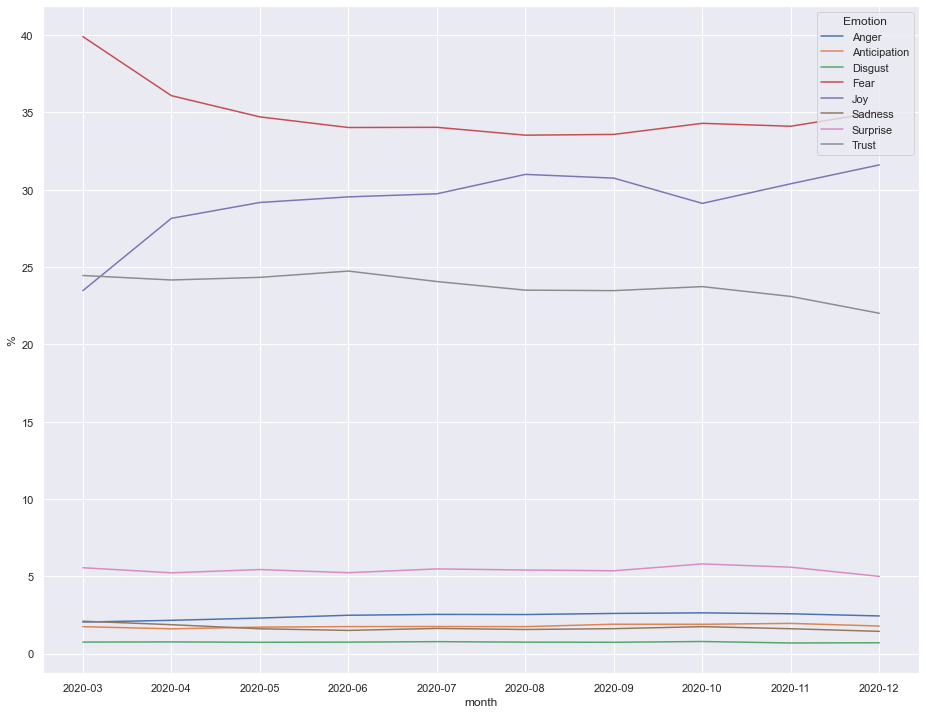

In [9]:
line = sns.lineplot(data=new, x="month", y="%", hue="Emotion")

In [23]:
# Saving the graph to a PNG
fig = line.get_figure()
fig.savefig("sentimentslinepc.png")

In [6]:
# Saving the data to a CSV
new.reset_index().to_csv("sentimentsgrouped.csv", index=False)